# Data Preprocessing

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the data
file_path = file_path = 'C:/Users/gaurav/Downloads/Documents/Machine Learning-Project/Data.xlsx'
data = pd.read_excel(file_path)

In [14]:
# Display the first few rows of the data
print("Data Preview:")
print(data.head())

Data Preview:
            Date-Time  Agitation     Batch ID    Operation    Phase  \
0 2024-04-27 03:00:00        100  Batch R1-07  Operation 2  Phase 3   
1 2024-04-27 04:00:00        100  Batch R1-07  Operation 2  Phase 3   
2 2024-04-27 05:00:00        100  Batch R1-07  Operation 2  Phase 4   
3 2024-04-27 06:00:00        100  Batch R1-07  Operation 2  Phase 5   
4 2024-04-27 07:00:00        100  Batch R1-07  Operation 2  Phase 5   

     Product  Reactor Temperature  Solution Concentration  Volume  
0  Product 2                40.64                 19.3152  2615.2  
1  Product 2                39.20                 21.1890  3074.4  
2  Product 2                36.44                 20.7900  2786.0  
3  Product 2                19.82                 21.3150  2965.2  
4  Product 2                20.10                 20.6430  2976.4  



Null Values Count:
Date-Time                 0
Agitation                 0
Batch ID                  0
Operation                 0
Phase                     0
Product                   0
Reactor Temperature       0
Solution Concentration    0
Volume                    0
dtype: int64


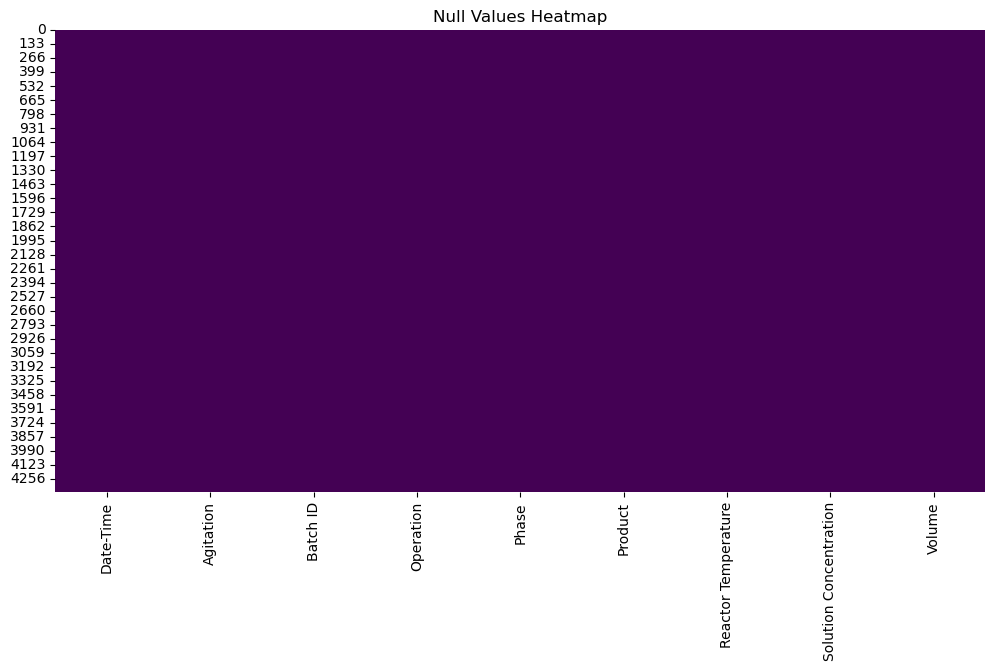

In [22]:
# Identifying null values
null_values = data.isnull().sum()
print("\nNull Values Count:")
print(null_values)

# Visualizing null values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Null Values Heatmap")
plt.show()

In [30]:
# Displaying the first few rows and summary statistics of the data for inspection
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date-Time               4380 non-null   datetime64[ns]
 1   Agitation               4380 non-null   int64         
 2   Batch ID                4380 non-null   object        
 3   Operation               4380 non-null   object        
 4   Phase                   4380 non-null   object        
 5   Product                 4380 non-null   object        
 6   Reactor Temperature     4380 non-null   float64       
 7   Solution Concentration  4380 non-null   float64       
 8   Volume                  4380 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 308.1+ KB


(            Date-Time  Agitation     Batch ID    Operation    Phase  \
 0 2024-04-27 03:00:00        100  Batch R1-07  Operation 2  Phase 3   
 1 2024-04-27 04:00:00        100  Batch R1-07  Operation 2  Phase 3   
 2 2024-04-27 05:00:00        100  Batch R1-07  Operation 2  Phase 4   
 3 2024-04-27 06:00:00        100  Batch R1-07  Operation 2  Phase 5   
 4 2024-04-27 07:00:00        100  Batch R1-07  Operation 2  Phase 5   
 
      Product  Reactor Temperature  Solution Concentration  Volume  
 0  Product 2                40.64                 19.3152  2615.2  
 1  Product 2                39.20                 21.1890  3074.4  
 2  Product 2                36.44                 20.7900  2786.0  
 3  Product 2                19.82                 21.3150  2965.2  
 4  Product 2                20.10                 20.6430  2976.4  ,
 None,
                  Date-Time    Agitation  Reactor Temperature  \
 count                 4380  4380.000000          4380.000000   
 mean   2024-0


Outliers Count for Each Column:
Agitation                 1498
Reactor Temperature          0
Solution Concentration       0
Volume                       0
dtype: int64


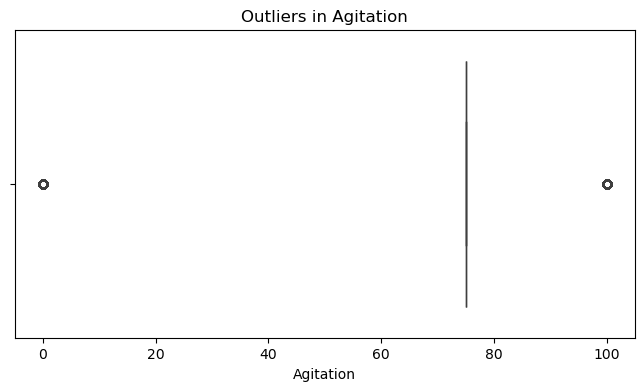

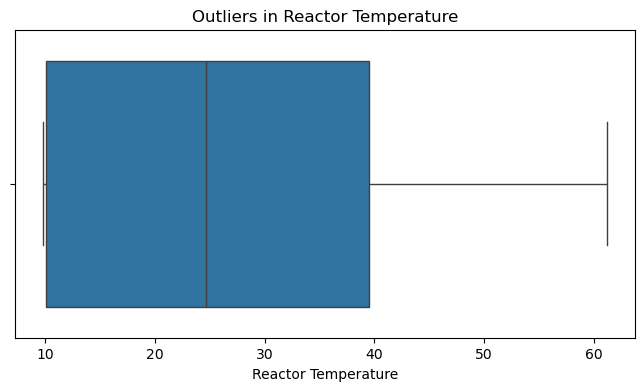

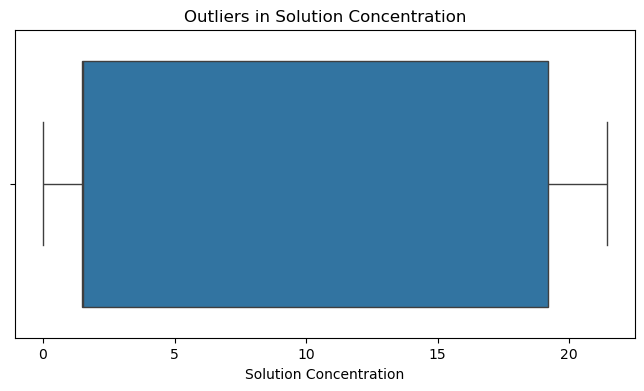

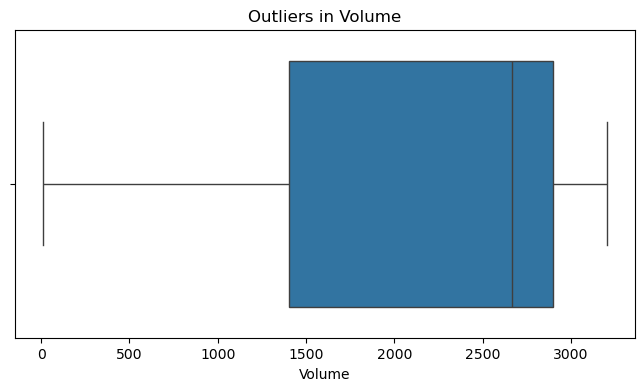

In [28]:
# Identifying outliers for specific numeric columns using the IQR method
numeric_columns = ['Agitation', 'Reactor Temperature', 'Solution Concentration', 'Volume']
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as values outside 1.5*IQR from Q1 and Q3
outliers = (data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))

# Counting outliers for each column
outliers_count = outliers.sum()
print("\nOutliers Count for Each Column:")
print(outliers_count)

# Visualizing outliers using box plots for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Outliers in {column}")
    plt.show()